In [2]:
import pandas as pd  # xử lý dữ liệu
import plotly.express as px  # biểu đồ tương tác
import matplotlib.pyplot as plt  # trực quan hóa dữ liệu
from sklearn.model_selection import train_test_split  # chia dữ liệu thành tập huấn luyện và kiểm tra
import numpy as np  # tính toán số học
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('data_goc.csv')
df.head(5)

,Average income of residents.,Average age of households.,Average room size.,Average playground size..,Population,House price
0,68559.57107,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,NaN,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [4]:
# Độ lớn dữ liệu
df.shape

(5028, 6)

In [6]:
# Tóm lược dữ liệu với describe
df.describe()

,Average income of residents.,Average age of households.,Average room size.,Average playground size..,Population,House price
count,4927.000000,4853.000000,4933.000000,4023.000000,4958.000000,5.028000e+03
mean,68539.386347,5.975659,6.990494,3.984893,36142.757236,1.232095e+06
std,10599.611017,0.979464,0.991573,1.226500,9568.855304,3.526324e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61503.652615,5.345859,6.317400,3.150000,29877.354227,9.987560e+05
50%,68606.870050,5.976767,6.990350,4.030000,36143.368790,1.232095e+06
75%,75672.049015,6.623682,7.654179,4.480000,42389.618025,1.470440e+06
max,107701.748400,9.519088,10.759588,6.500000,69575.449460,2.469066e+06


In [5]:
# Thống kê dữ liệu khuyết.
df.isnull().sum()

,0
Average income of residents.,101
Average age of households.,175
Average room size.,95
Average playground size..,1005
Population,70
House price,0


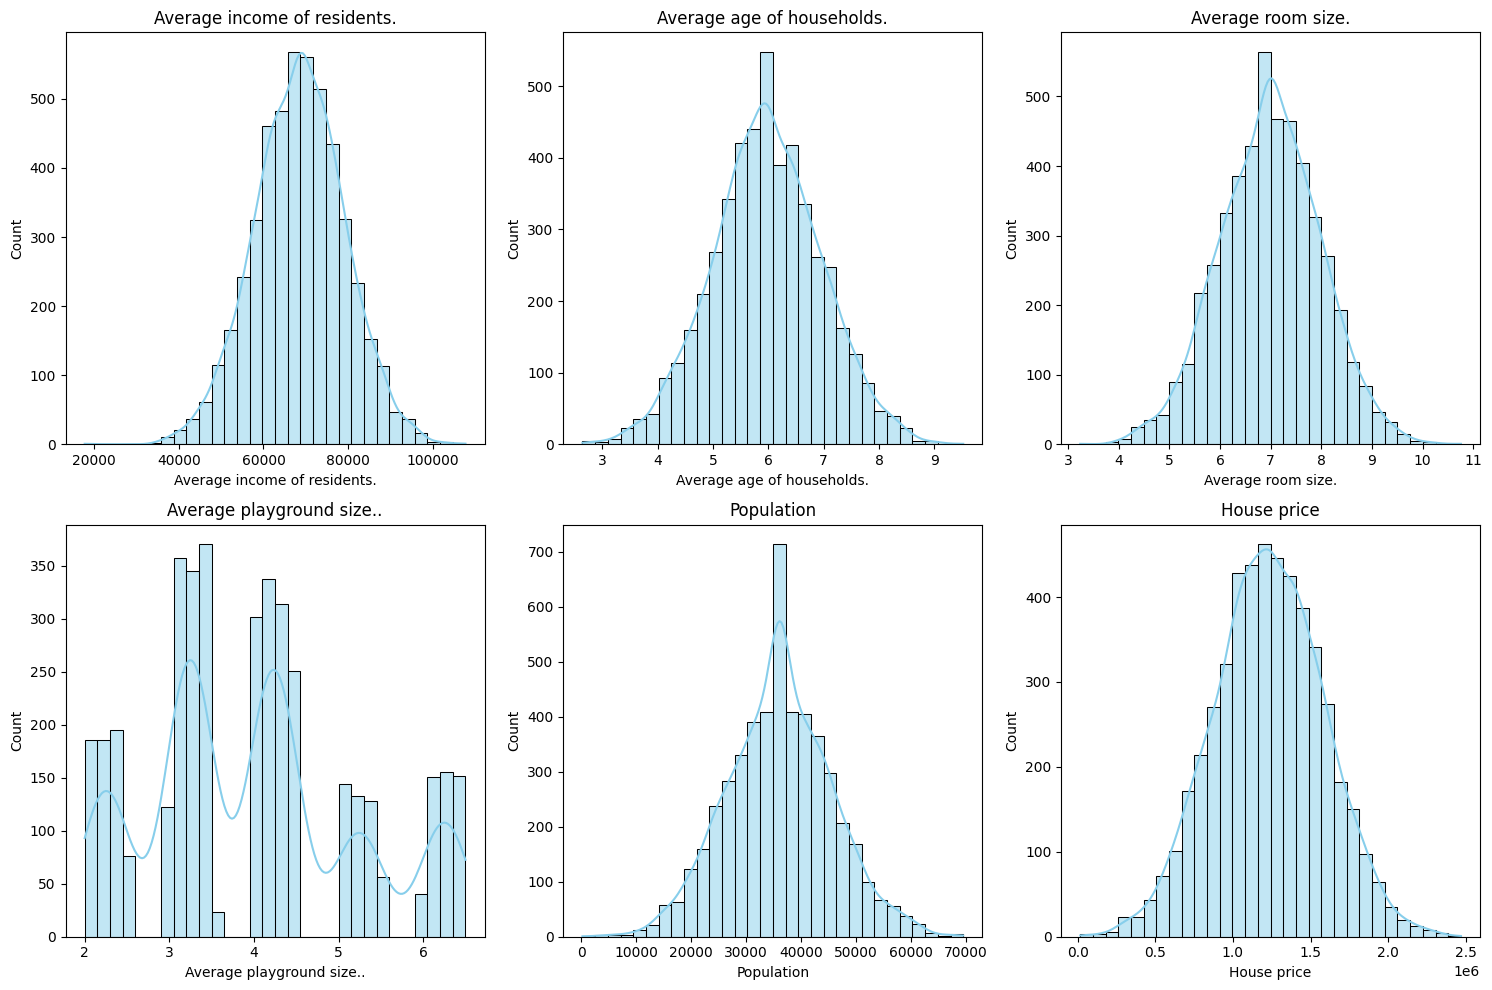

In [7]:
# Vẽ biểu đồ histogram với từng biến
num_columns = df.select_dtypes(include=['number']).columns  # Chỉ chọn cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)  # Chỉnh kích thước lưới hiển thị
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

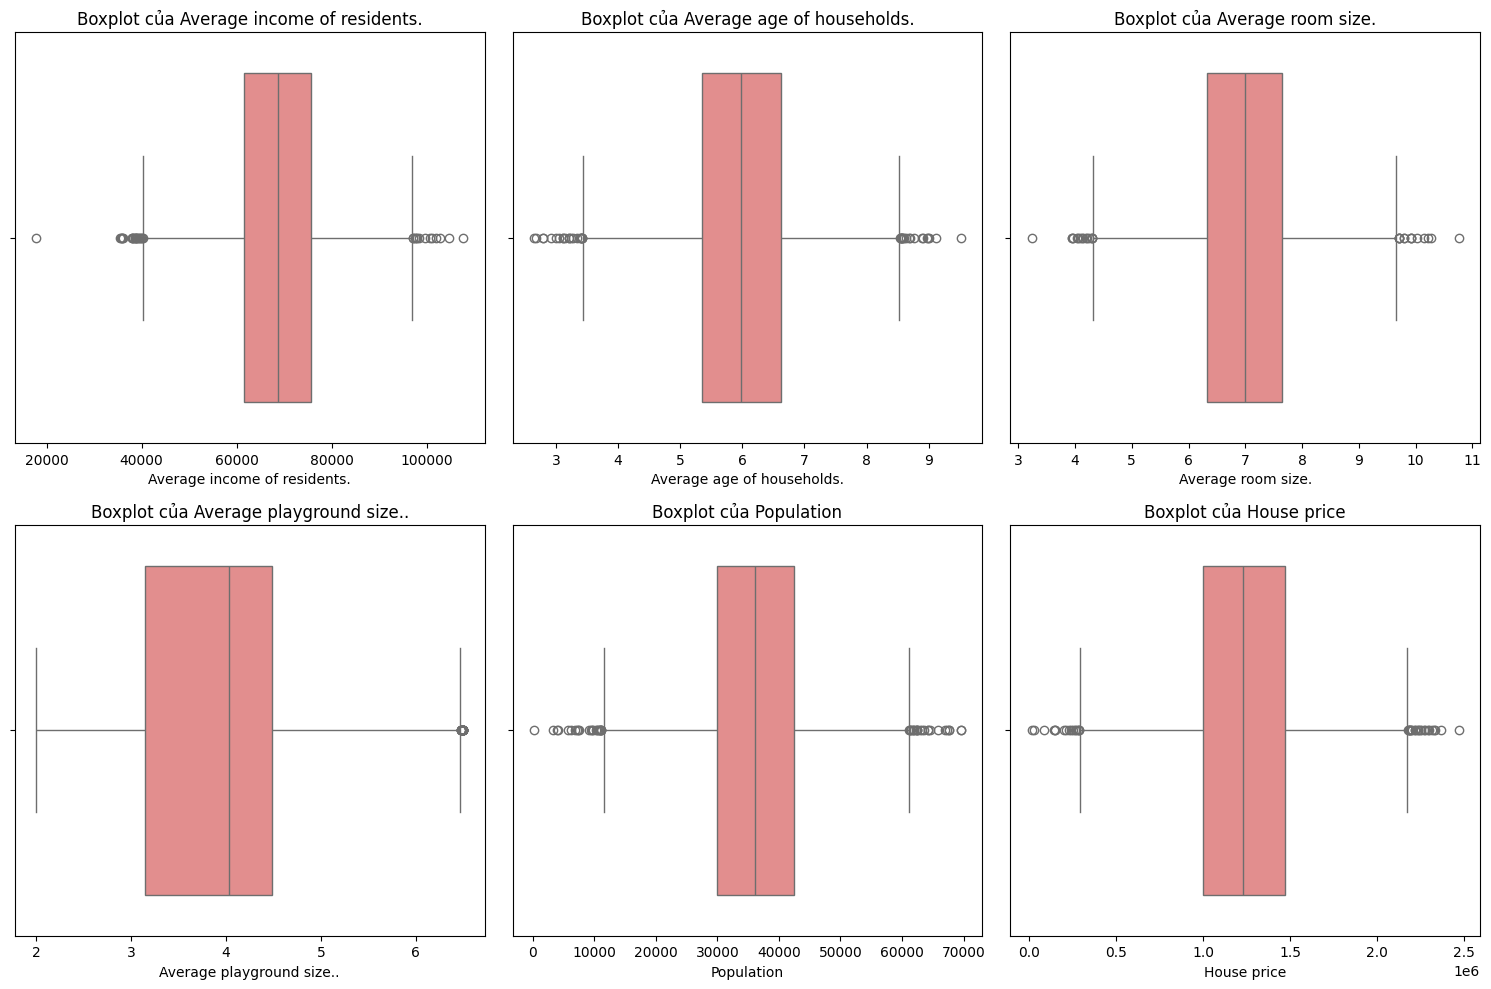

In [8]:
# Vẽ boxplot để phát hiện outliers
num_columns = df.select_dtypes(include=['number']).columns  # Chỉ chọn cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot của {col}')

plt.tight_layout()
plt.show()

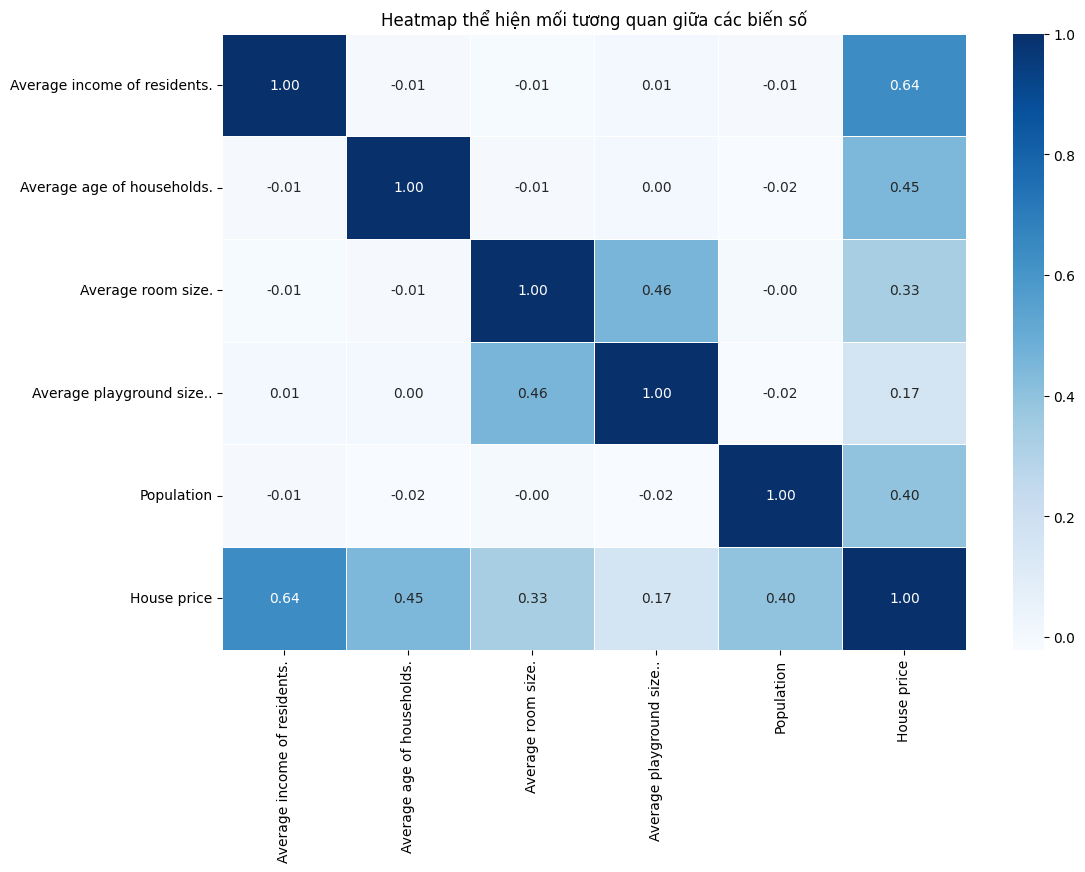

In [9]:
# Vẽ heatmap thể hiện mối quan hệ giữa các biến số
plt.figure(figsize=(12, 8))
corr_matrix = df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Heatmap thể hiện mối tương quan giữa các biến số")
plt.show()

In [12]:
# Thực hiện xử lý dữ liệu khuyết:
df['Average income of residents.'].fillna(df['Average income of residents.'].mean(), inplace=True)
df['Average age of households.'].fillna(df['Average age of households.'].mean(), inplace=True)
df['Average room size.'].fillna(df['Average room size.'].mean(), inplace=True)
df['Average playground size..'].fillna(df['Average playground size..'].mean(), inplace=True)
df['Population'].fillna(df['Population'].mean(), inplace=True)
df['House price'].fillna(df['House price'].mean(), inplace=True)
# Thống kê dữ liệu khuyết.
df.isnull().sum()

<ipython-input-12-652c8e5367af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Average income of residents.'].fillna(df['Average income of residents.'].mean(), inplace=True)
<ipython-input-12-652c8e5367af>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

,0
Average income of residents.,0
Average age of households.,0
Average room size.,0
Average playground size..,0
Population,0
House price,0


In [22]:
# # Hàm loại bỏ các giá trị gây nhiễu
# for column in df.columns:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Processing outliers
z_threshold = 3

for column in df.columns:
    # Tính trung bình và độ lệch chuẩn của cột
    mean = df[column].mean()
    std = df[column].std()

    # Tính Z-score
    z_scores = (df[column] - mean) / std

    # Xác định các chỉ số vượt ngưỡng Z-score
    index_lower = np.where(z_scores < -z_threshold)[0]
    index_upper = np.where(z_scores > z_threshold)[0]

    # In số lượng outliers
    print(column + ":", len(index_lower), len(index_upper))

    # Xử lý outliers: Thay thế bằng ngưỡng
    lower_threshold = mean - z_threshold * std
    upper_threshold = mean + z_threshold * std
    df.loc[index_lower, column] = lower_threshold
    df.loc[index_upper, column] = upper_threshold

Average income of residents.: 6 6
Average age of households.: 7 7
Average room size.: 6 0
Average playground size..: 0 0
Population: 10 8
House price: 0 0


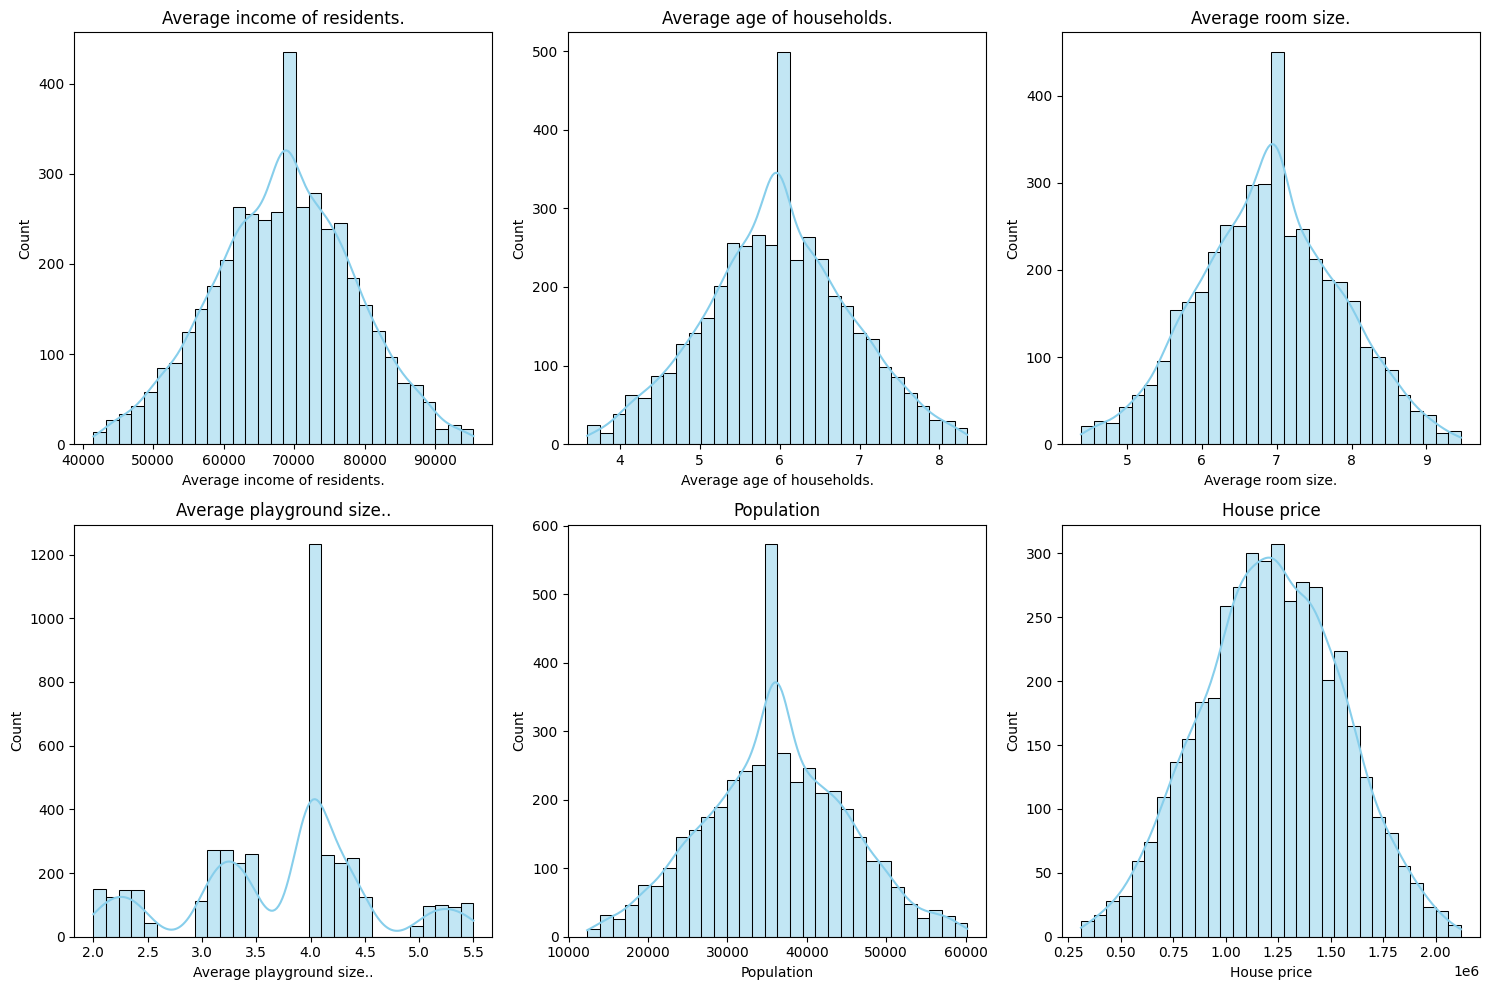

In [ ]:
# Vẽ biểu đồ histogram với từng biến
num_columns = df.select_dtypes(include=['number']).columns  # Chỉ chọn cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)  # Chỉnh kích thước lưới hiển thị
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()


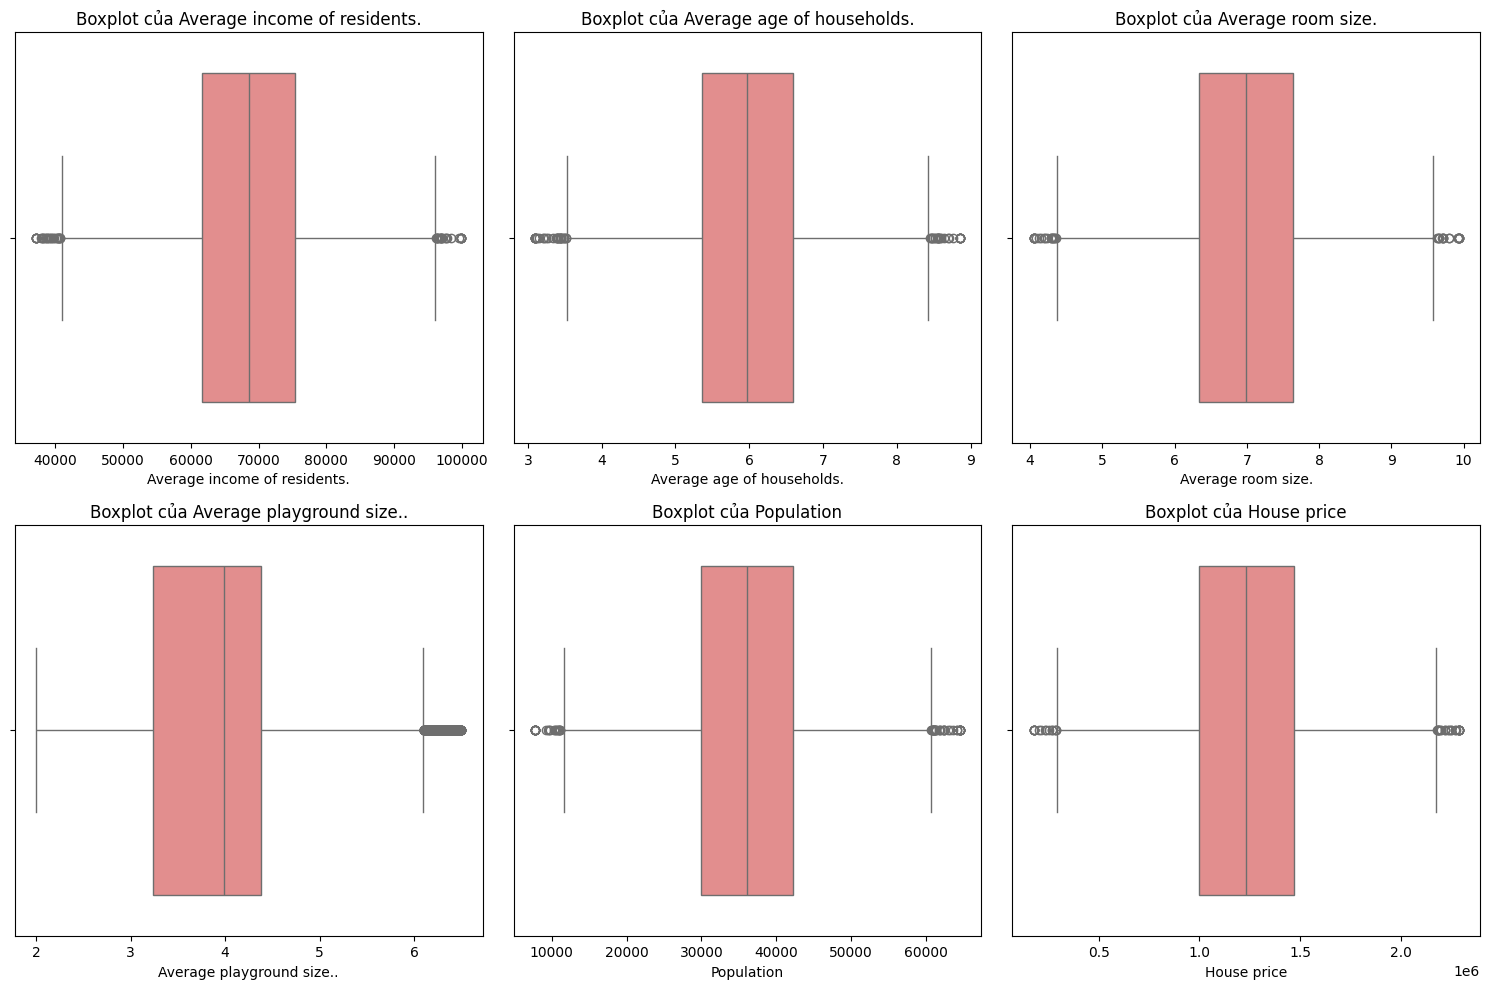

In [23]:
# Vẽ boxplot để phát hiện outliers
num_columns = df.select_dtypes(include=['number']).columns  # Chỉ chọn cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot của {col}')

plt.tight_layout()
plt.show()

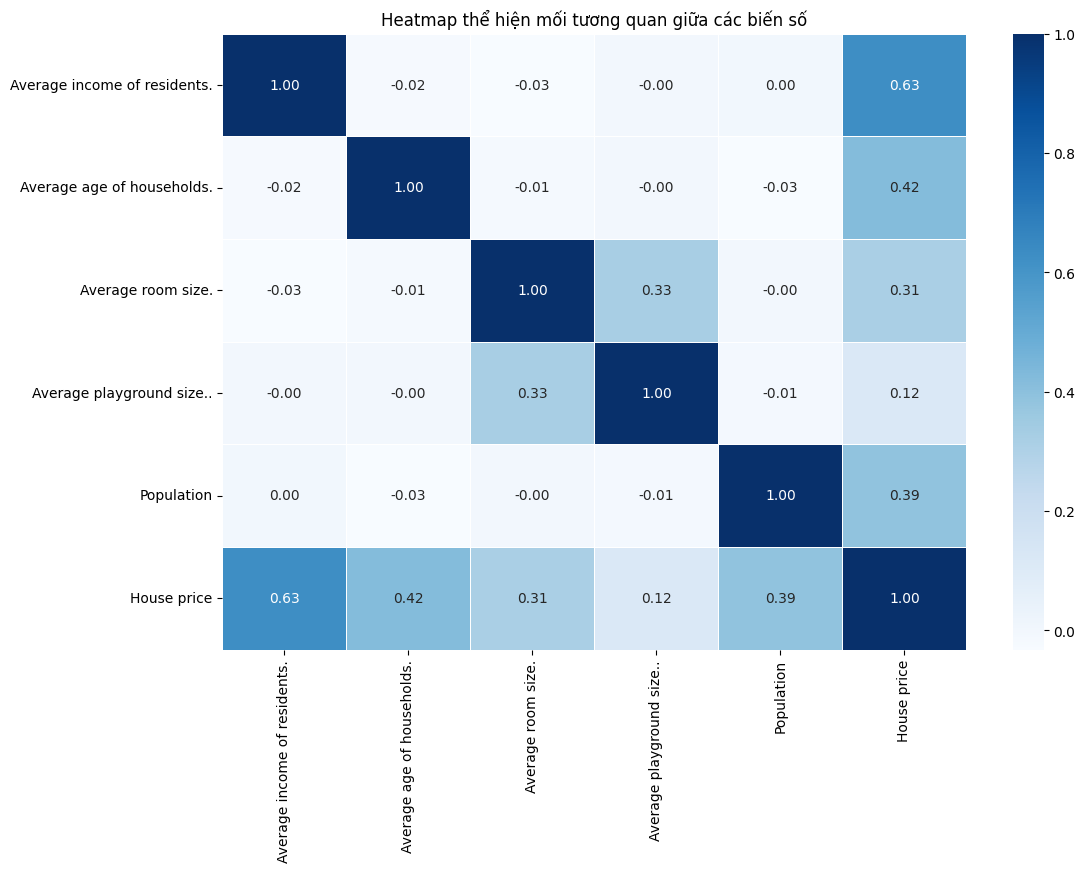

In [ ]:
# Vẽ heatmap thể hiện mối quan hệ giữa các biến số
plt.figure(figsize=(12, 8))
corr_matrix = df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Heatmap thể hiện mối tương quan giữa các biến số")
plt.show()

In [28]:
# Chia dữ liệu thành k tập con
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [29]:
# Gán dữ liệu
X = df.drop(columns=['House price'])
Y = df['House price']

In [30]:
# Huấn luyện mô hình trên từng fold
# Danh sách lưu lỗi MSE của từng fold
mse_scores = {}
all_results = []
# Vòng lặp qua từng fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Huấn luyện mô hình hồi quy tuyến tính
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    # Lưu dữ liệu mô hình
    fold_results = pd.DataFrame({'Fold': fold, 'actual': y_test.values, 'Predicted': y_pred.flatten()})
    all_results.append(fold_results)
    # Đánh giá độ chính xác

    # Đánh giá mô hình bằng Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[fold] = mse

In [31]:
# In kết quả mô hình trong mỗi lần thử
final_results = pd.concat(all_results, ignore_index=True)
print(final_results)

      Fold        actual     Predicted
0        1  7.988695e+05  7.638784e+05
1        1  1.042814e+06  6.746854e+05
2        1  7.439998e+05  1.005746e+06
3        1  1.125693e+06  1.192865e+06
4        1  1.577018e+06  1.373868e+06
...    ...           ...           ...
5023    10  1.203850e+06  1.196400e+06
5024    10  9.441862e+05  1.004374e+06
5025    10  1.608727e+06  1.514859e+06
5026    10  1.267434e+06  1.185783e+06
5027    10  1.222887e+06  8.949439e+05

[5028 rows x 3 columns]


In [32]:
# Kiểm tra độ chính xác của thuật toán
MSE = pd.DataFrame(list(mse_scores.items()), columns=['Model', 'MSE'])
print(MSE.head(10))
average_mse = np.mean(list(mse_scores.values()))
print(f"Trung bình MSE: {average_mse:.4f}")

   Model           MSE
0      1  1.703237e+10
1      2  1.642596e+10
2      3  1.709138e+10
3      4  1.541223e+10
4      5  1.595469e+10
5      6  1.461659e+10
6      7  1.665936e+10
7      8  1.514389e+10
8      9  1.456620e+10
9     10  1.464620e+10
Trung bình MSE: 15754886988.4581


In [ ]:
# Nhập dữ liệu từ người dùng
x1 = input("Nhập thu nhập trung bình của người dân: x1 = ")
x2 = input("Nhập trung bình độ tuổi của người nhà: x2 = ")
x3 = input("Nhập diện tích các phòng: x3 = ")
x4 = input("Nhập diện tích sân: x4 = ")
x5 = input("Nhập dân số tại khu vực đó: x5 = ")
print("Giá trị của đầu vào:")
print (x1, x2, x3, x4, x5)
# Chuyển dữ liệu nhập thành mảng số
numbers = [x1, x2, x3, x4, x5]
arr_number = np.array(numbers)
arr_number = arr_number.astype(int)

# Tính giá nhà dự đoán
giaNhaDuDoan_Y = model.predict(np.array(arr_number).reshape(1, -1))
# In kết quả
print("Giá nhà dự đoán là: " + str(giaNhaDuDoan_Y[0]))


Nhập thu nhập trung bình của người dân: x1 = 10000000
Nhập trung bình độ tuổi của người nhà: x2 = 23
Nhập diện tích các phòng: x3 = 20
Nhập diện tích sân: x4 = 10
Nhập dân số tại khu vực đó: x5 = 100
Giá trị của đầu vào:
10000000 23 20 10 100
Giá nhà dự đoán là: 217037616.65475443


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
